# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [1]:
#Import all libraries you may need in this cell:
import pandas as pd 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt 
%matplotlib inline

## 1 - Finding the COVID-19 numbers per state.

In [2]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]
stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

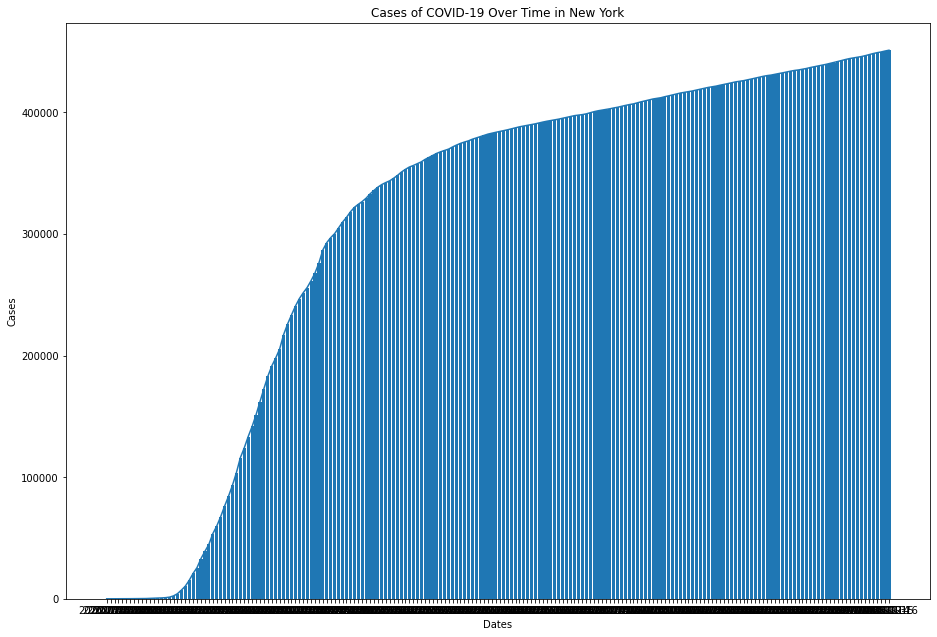

In [16]:
def covid19(state):
  df_State = df.loc[df["state"]== state]
  df_data = df_State.loc[:,["date", "cases"]]
  fig = plt.figure()                
  ax = fig.add_axes([0, 0, 2, 2]) #add_axes is amethod that takes a list of 4 number where you wanna start x-axis, whre you wanna start on y-axis, and the length and width of figure 
#[starting point x, starting point y, length, width]
  dates = df_data["date"] #x values
  data_1 = df_data["cases"] #y values 

  plt.plot(dates, data_1) #line graph
  plt.bar(dates, data_1) #bar graph
  plt.xlabel("Dates")
  plt.ylabel("Cases")
  plt.title("Cases of COVID-19 Over Time in " + state)

 
  return plt.plot and plt.bar and  plt.show()
covid19("New York")

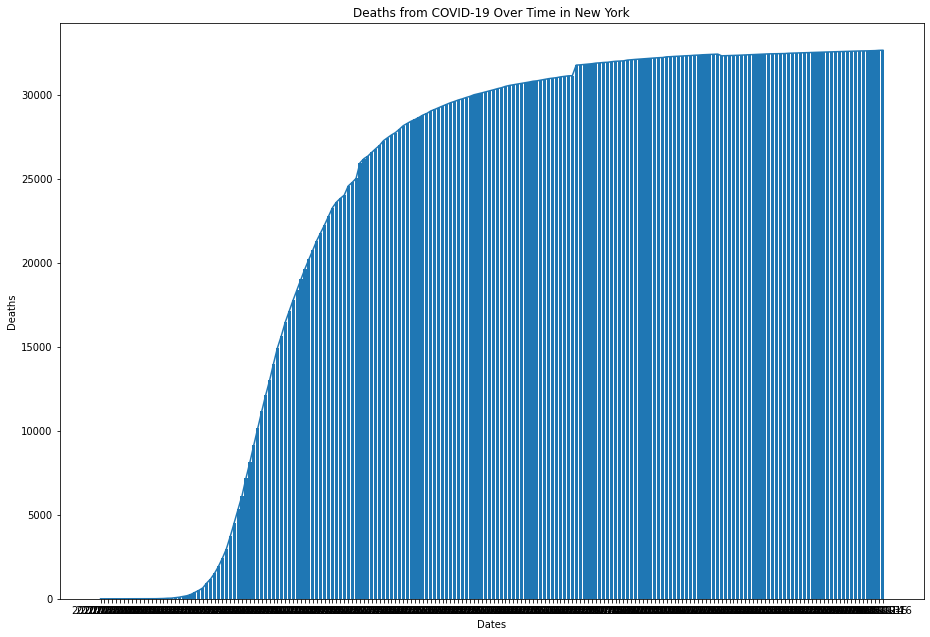

In [5]:
def covid19_deaths(state):
  df_State = df.loc[df["state"]== state]
  df_data = df_State.loc[:,["date", "deaths"]]
  fig = plt.figure()                
  ax = fig.add_axes([0, 0, 2, 2]) #add_axes is amethod that takes a list of 4 number where you wanna start x-axis, whre you wanna start on y-axis, and the length and width of figure 
#[starting point x, starting point y, length, width]
  dates = df_data["date"] #x values
  data_1 = df_data["deaths"] #y values 

  plt.plot(dates, data_1) #line graph
  plt.bar(dates, data_1) #bar graph
  plt.xlabel("Dates")
  plt.ylabel("Deaths")
  plt.title("Deaths from COVID-19 Over Time in " + state)
  return plt.plot and plt.bar and  plt.show()
covid19_deaths("New York")

Call the functions on your assigned state to visualize the data.

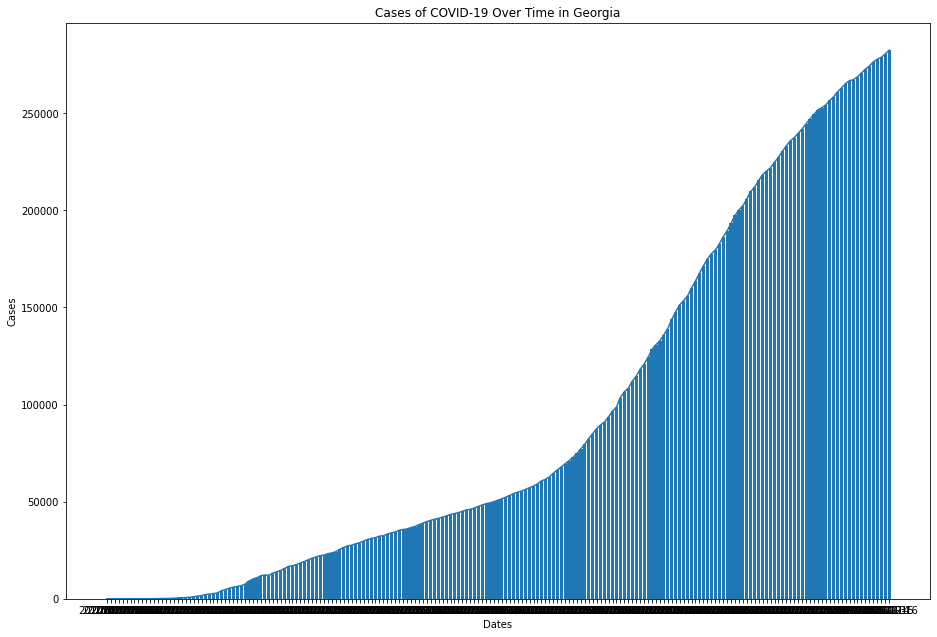

In [6]:
covid19("Georgia")

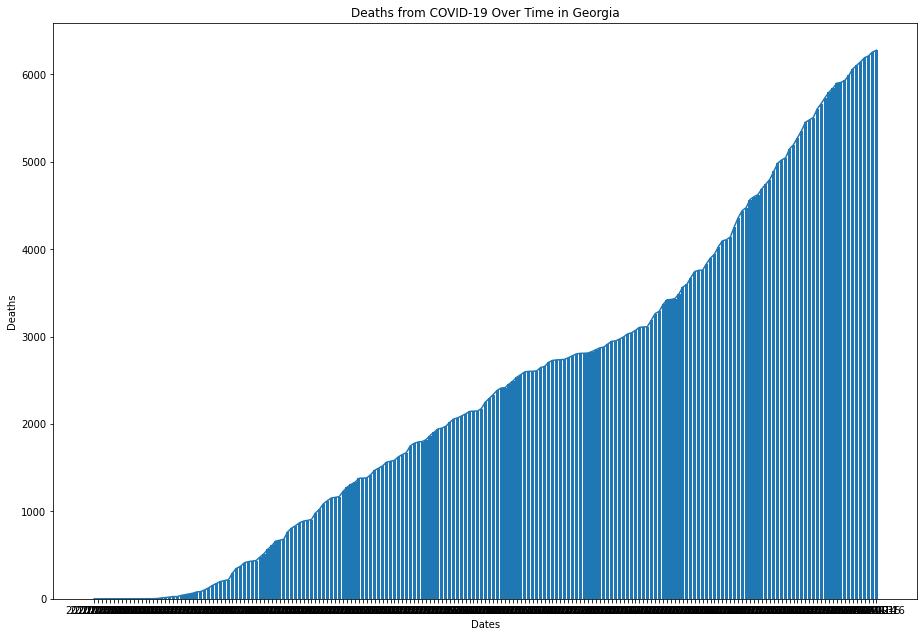

In [7]:
covid19_deaths("Georgia")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [8]:
#Dataframe Formatter
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state']) #a colomun of states
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01" #goes through the date column in org df, a starting point,if it is not equal to jan 1st,2020, it zeroes out evrything 
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True) #instead of making the index numbers, it makes it states

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [9]:
#Call the function and assign what it returns to the dataframe variables you will be using.
dfFormatter(df, "deaths")


,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1755.0,1768.0,1797.0,1847.0,1882.0,1890.0,1893.0,1896.0,1898.0,1925.0,1936.0,1944.0,1974.0,1996.0,2011.0,2013.0,2024.0,2037.0,2045.0,2076.0,2107.0,2152.0,2162.0,2182.0,2200.0,2217.0,2233.0,2266.0,2275.0,2276.0,2276.0,2277.0,2285.0,2301.0,2333.0,2350.0,2351.0,2355.0,2387.0,2392.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,24.0,24.0,24.0,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0,28.0,29.0,30.0,30.0,33.0,34.0,34.0,34.0,34.0,34.0,34.0,36.0,36.0,37.0,37.0,39.0,39.0,39.0,39.0,39.0,39.0,40.0,41.0,41.0,41.0,41.0,41.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4140.0,4152.0,4157.0,4205.0,4348.0,4385.0,4426.0,4497.0,4509.0,4509.0,4535.0,4643.0,4688.0,4698.0,4760.0,4775.0,4775.0,4796.0,4899.0,4932.0,4980.0,5010.0,5033.0,5031.0,5048.0,5070.0,5133.0,5174.0,5207.0,5221.0,5219.0,5221.0,5253.0,5275.0,5290.0,5316.0,5322.0,5322.0,5346.0,5376.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,535.0,544.0,555.0,566.0,573.0,582.0,587.0,600.0,599.0,603.0,619.0,631.0,641.0,663.0,674.0,687.0,696.0,711.0,732.0,739.0,756.0,772.0,784.0,797.0,814.0,841.0,861.0,873.0,882.0,894.0,908.0,917.0,928.0,940.0,953.0,969.0,981.0,992.0,1150.0,1157.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10299.0,10365.0,10460.0,10654.0,10808.0,10995.0,11146.0,11229.0,11245.0,11334.0,11523.0,11686.0,11801.0,11984.0,12137.0,12152.0,12250.0,12409.0,12547.0,12696.0,12836.0,12906.0,12939.0,13020.0,13149.0,13330.0,13497.0,13644.0,13708.0,13730.0,13763.0,13843.0,13990.0,14094.0,14265.0,14333.0,14386.0,14458.0,14606.0,14716.0
5,Colorado,39.739167,-104.984167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1862.0,1863.0,1868.0,1878.0,1881.0,1886.0,1892.0,1897.0,1897.0,1903.0,1906.0,1906.0,1909.0,1915.0,1923.0,1925.0,1926.0,1932.0,1933.0,1937.0,1945.0,1946.0,1945.0,1952.0,1953.0,1960.0,1963.0,1973.0,1978.0,1980.0,1980.0,1980.0,1984.0,1988.0,1991.0,1994.0,1994.0,2000.0,2006.0,2010.0
6,Connecticut,41.767000,-72.677000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4441.0,4441.0,4444.0,4444.0,4450.0,4450.0,4453.0,4453.0,4453.0,4456.0,4456.0,4457.0,4458.0,4460.0,4460.0,4460.0,4460.0,4463.0,4463.0,4465.0,4465.0,4465.0,4465.0,4465.0,4466.0,4467.0,4468.0,4468.0,4468.0,4468.0,4468.0,4474.0,4474.0,4478.0,

In [10]:
def d_c(date, dc): #dc = deaths or cases
  df_dc = dfFormatter(df, dc)
  colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
          "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
          "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E" ]
  fig = go.Figure(data = go.Choropleth(
   locationmode = "USA-states", 
   locations = stateAbbreviationList,
   z = df_dc[date], #z repsents the color assignments,  the location, and what data you are accessing
   colorscale = colors,
   reversescale = False,
   autocolorscale = False #gives default patterns
#array = list 
  ))
  fig.update_layout(
     title_text = "Number of COVID-19 " + dc + "in USA",
     geo = dict(showcoastlines = True, scope = "usa"))
  fig.show()


In [11]:
d_c("2020-05-12", "deaths")

## 2 - Analyzing Its Impact on the United States

Group 5 -

The cancellation of public events and gatherings have impacted the world's work-life balance in ways never seen before. Using the following dataset from Oxford University(https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/c4_restrictionsongatherings.csv), create a choropleth map of the # of gathering restrictions imposed in each country.

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..